In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

In [2]:
data_set = pd.read_csv('Salary_Data.csv')

In [3]:
data_set

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
# y is the dependent variable --> the output
# i.e. salary is dependent on the years of experience

In [5]:
X = data_set['YearsExperience']
y = data_set.iloc[:,1].values

In [6]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.33,random_state = 0)

Illustrating the tables

In [9]:
Xtrain = pd.DataFrame(data=X_train)

In [10]:
Xtest = pd.DataFrame(data=X_test)

In [11]:
ytrain = pd.DataFrame(data=y_train)

In [12]:
ytest = pd.DataFrame(data=y_test)

In [34]:
ytest

,Actual Salary,Predictions
0,37731.0,40835.105909
1,122391.0,123079.399408
2,57081.0,65134.556261
3,63218.0,63265.367772
4,116969.0,115602.645454
5,109431.0,108125.891499
6,112635.0,116537.239698
7,55794.0,64199.962017
8,83088.0,76349.687193
9,101302.0,100649.137545


Fit the Simple Linear Regression Model to the Training Set

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
regressor = LinearRegression()

In [15]:
regressor.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Predict New Observations

In [16]:
y_pred = regressor.predict(Xtest)

In [17]:
# y pred are the predicted values against the values in the ytest
ypred = pd.DataFrame(y_pred)

In [18]:
ypred.rename_axis({0:'Predictions'},axis=1,inplace=True)

In [19]:
ytest['Predictions'] = ypred['Predictions']

In [29]:
ytest.rename_axis(mapper={0:'Actual Salary'},axis=1,inplace=True)

In [30]:
ytest

,Actual Salary,Predictions
0,37731.0,40835.105909
1,122391.0,123079.399408
2,57081.0,65134.556261
3,63218.0,63265.367772
4,116969.0,115602.645454
5,109431.0,108125.891499
6,112635.0,116537.239698
7,55794.0,64199.962017
8,83088.0,76349.687193
9,101302.0,100649.137545


In [22]:
i = regressor.intercept_

In [31]:
i

array([26816.19224403])

In [23]:
s = regressor.coef_

In [32]:
s

array([[9345.94244312]])

In [24]:
(s*1.5) + i

array([[40835.10590871]])

In [25]:
regressor.predict(1.5)

array([[40835.10590871]])

In [33]:
regressor.predict(10)

array([[120275.61667525]])

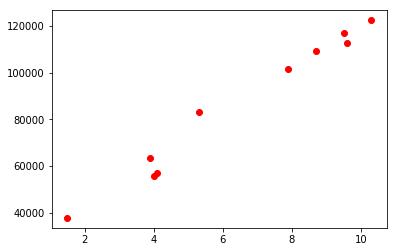

In [44]:
plot = plt.scatter(X_test,y_test, color = 'red')

Text(0,0.5,'Salary')

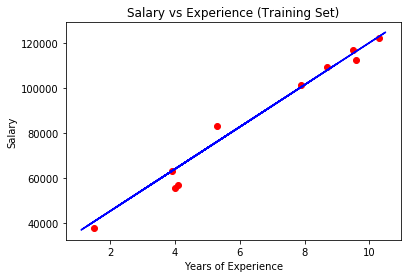

In [45]:
plt.scatter(X_test,y_test, color = 'red')
plt.plot(Xtrain, regressor.predict(Xtrain), color = 'blue')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')